<a href="https://colab.research.google.com/github/afrahhassan/afrahhassan/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# <div align="center"><font>  </font></div>
# <div align="center"><font> COSC 2793 Computational Machine Learning </font></div>
## <div align="center"> <font> Assignment 2: Machine Learning Project </font></div>
## <div align="center"> <font> S3930076 Afrah Hassan A Alshaikh Ali & S3569266 Chang Su </font></div>
---

In [54]:
#Import Libraries
import os
import csv
import zipfile
import pandas as pd
import cv2
import numpy as np



# **1. Load and Preprocess the Data**

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
os.listdir('/content/drive/MyDrive/Assignment2')

['assignment2_PG.pdf',
 'COSC2673_2793_A2_EOI_.docx',
 'trafficsigns_dataset',
 'trafficsigns_dataset.zip',
 'shape.csv',
 'type.csv',
 'assignment2.ipynb']

In [89]:
!cp -r "/content/drive/MyDrive/Assignment2" .

In [90]:
zip_file_path = '/content/drive/My Drive/Assignment2/trafficsigns_dataset.zip'
extract_to_path = '/content/trafficsigns_dataset'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
print("Extraction completed!")

Extraction completed!


Load the images and corresponding labels from the dataset.

### Export shape to csv


In [91]:
root_dir = '/content/trafficsigns_dataset'
output_csv = '/content/drive/My Drive/Assignment2/shape.csv'

with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'class'])

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                full_path = os.path.join(root, file)
                class_name = os.path.basename(os.path.dirname(root))
                writer.writerow([full_path, class_name])

print("CSV file has been created successfully.")

CSV file has been created successfully.


### Export type to csv

In [92]:
root_dir = '/content/trafficsigns_dataset'
output_csv = '/content/drive/My Drive/Assignment2/type.csv'
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'class'])

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                full_path = os.path.join(root, file)
                class_name = os.path.basename(root)
                writer.writerow([full_path, class_name])
print("CSV file has been created successfully.")

CSV file has been created successfully.


find each type and shape


In [93]:
# Load the data from the CSV file
data_1 = pd.read_csv('/content/drive/My Drive/Assignment2/shape.csv')
data_1.head()

,image_path,class
0,/content/trafficsigns_dataset/trafficsigns_dat...,round
1,/content/trafficsigns_dataset/trafficsigns_dat...,round
2,/content/trafficsigns_dataset/trafficsigns_dat...,round
3,/content/trafficsigns_dataset/trafficsigns_dat...,round
4,/content/trafficsigns_dataset/trafficsigns_dat...,round


In [94]:
# Find the number of unique types/classes
num_shapes = data_1['class'].nunique()

# Get the count of each unique type/class
shape_counts = data_1['class'].value_counts()

print("Number of unique shapes:", num_shapes)
print("unique shapes:", shape_counts)

Number of unique shapes: 5
unique shapes: class
round       3520
triangle    1852
square      1376
diamond      564
hex           86
Name: count, dtype: int64


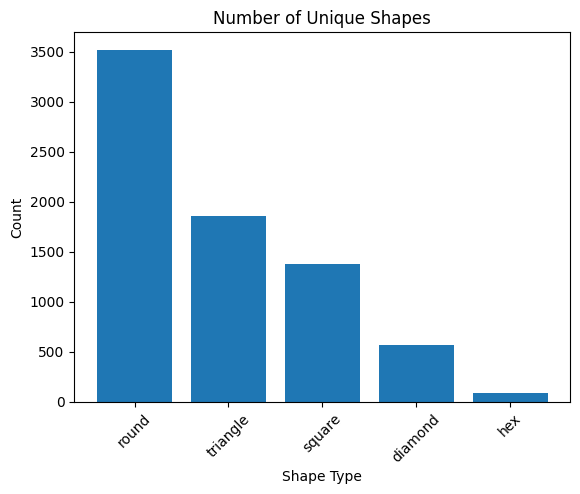

In [95]:
#Plot the shapes
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract data for plotting
class_names = shape_counts.index.to_list()
class_counts = shape_counts.to_numpy()

# Create a bar plot
plt.bar(class_names, class_counts)

# Add title and labels
plt.title("Number of Unique Shapes")
plt.xlabel("Shape Type")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [96]:
# Load the data from the CSV file
data_2 = pd.read_csv('/content/drive/My Drive/Assignment2/type.csv')
data_2.head()


,image_path,class
0,/content/trafficsigns_dataset/trafficsigns_dat...,noentry
1,/content/trafficsigns_dataset/trafficsigns_dat...,noentry
2,/content/trafficsigns_dataset/trafficsigns_dat...,noentry
3,/content/trafficsigns_dataset/trafficsigns_dat...,noentry
4,/content/trafficsigns_dataset/trafficsigns_dat...,noentry


In [97]:
# Find the number of unique types/classes
num_types = data_2['class'].nunique()
# Get the count of each unique type/class
type_counts = data_2['class'].value_counts()

print("Number of unique types:", num_types)
print("unique types:", type_counts)

Number of unique types: 16
unique types: class
warning             1390
noentry              750
speed                632
bicycle              570
rightofway           564
parking              552
noparking            484
giveway              462
continue             398
trafficdirective     390
limitedtraffic       250
traveldirection      248
laneend              236
roundabout           196
crossing             190
stop                  86
Name: count, dtype: int64


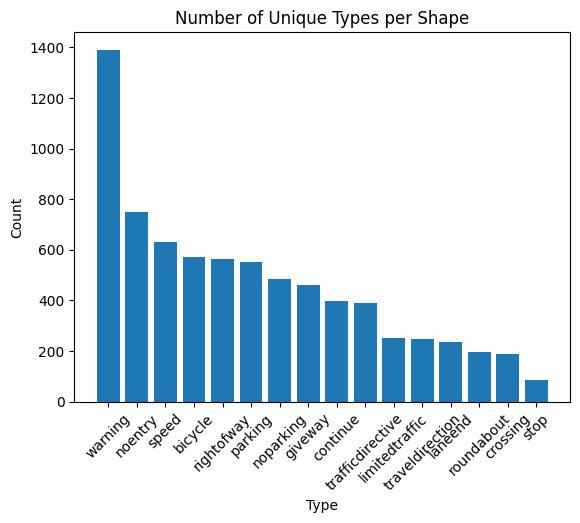

In [98]:
#Plot the types
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract data for plotting
class_names = type_counts.index.to_list()
class_counts = type_counts.to_numpy()

# Create a bar plot
plt.bar(class_names, class_counts)

# Add title and labels
plt.title("Number of Unique Types per Shape")
plt.xlabel("Type")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [99]:
main = pd.concat([data_1, data_2], axis=0)
main

,image_path,class
0,/content/trafficsigns_dataset/trafficsigns_dat...,round
1,/content/trafficsigns_dataset/trafficsigns_dat...,round
2,/content/trafficsigns_dataset/trafficsigns_dat...,round
3,/content/trafficsigns_dataset/trafficsigns_dat...,round
4,/content/trafficsigns_dataset/trafficsigns_dat...,round
...,...,...
7393,/content/trafficsigns_dataset/__MACOSX/traffic...,rightofway
7394,/content/trafficsigns_dataset/__MACOSX/traffic...,rightofway
7395,/content/trafficsigns_dataset/__MACOSX/traffic...,rightofway
7396,/content/trafficsigns_dataset/__MACOSX/traffic...,rightofway


In [103]:
# Find the number of unique types/classes
num_merge = main['class'].nunique()
# Get the count of each unique type/class
merge_counts = main['class'].value_counts()

print("Number of unique types:", num_merge)
print("unique types:", merge_counts)

Number of unique types: 21
unique types: class
round               3520
triangle            1852
warning             1390
square              1376
noentry              750
speed                632
bicycle              570
rightofway           564
diamond              564
parking              552
noparking            484
giveway              462
continue             398
trafficdirective     390
limitedtraffic       250
traveldirection      248
laneend              236
roundabout           196
crossing             190
hex                   86
stop                  86
Name: count, dtype: int64


In [106]:
print('The dataset has {} shapes'.format(len(data_1['class'].unique())))
print('The dataset has {} types'.format(len(data_2['class'].unique())))

The dataset has 5 shapes
The dataset has 16 types


In [107]:
#check the number of classifications for cell type
print(pd.unique(main['class']))

['round' 'hex' 'square' 'triangle' 'diamond' 'noentry' 'bicycle'
 'roundabout' 'speed' 'limitedtraffic' 'noparking' 'trafficdirective'
 'traveldirection' 'stop' 'laneend' 'crossing' 'continue' 'parking'
 'warning' 'giveway' 'rightofway']


EDA

In [100]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7398 non-null   object
 1   class       7398 non-null   object
dtypes: object(2)
memory usage: 115.7+ KB


In [101]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7398 non-null   object
 1   class       7398 non-null   object
dtypes: object(2)
memory usage: 115.7+ KB


In [102]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14796 entries, 0 to 7397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  14796 non-null  object
 1   class       14796 non-null  object
dtypes: object(2)
memory usage: 346.8+ KB


Convert images to numbers


In [53]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# encoder = LabelEncoder()

# # Encode the "class" column in shape.csv
# main['class'] = encoder.fit_transform(main['class'])


# # Now both "shape" and "type" columns are encoded


In [66]:
# from sklearn.preprocessing import LabelEncoder
# # Create separate LabelEncoder objects for shape and type
# shape_encoder = LabelEncoder()
# type_encoder = LabelEncoder()

# # Encode the shape and type columns
# data_1['shape_encoded'] = shape_encoder.fit_transform(data_1['class'])  #7398
# data_2['type_encoded'] = type_encoder.fit_transform(data_2['class'])  #7398

# # Now you can train your models using the encoded columns

In [68]:
data_2.head()

,image_path,class,type_encoded
0,/content/trafficsigns_dataset/trafficsigns_dat...,noentry,6
1,/content/trafficsigns_dataset/trafficsigns_dat...,noentry,6
2,/content/trafficsigns_dataset/trafficsigns_dat...,noentry,6
3,/content/trafficsigns_dataset/trafficsigns_dat...,noentry,6
4,/content/trafficsigns_dataset/trafficsigns_dat...,noentry,6


# **2. Split the Data**

# **3. Choose a Model**


Baseline Model


# **4. Train the Model**


# **5. Evaluate the Model**